In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot  as plt
from matplotlib import font_manager
myfont = font_manager.FontProperties(fname=r".\utils\NotoSansCJK-Black.ttc")
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings

def ignore_warn(*args, **kwargs):
    pass

from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.decomposition import PCA
from sklearn import manifold

train = pd.read_csv('./dataset/training_data.csv', sep=",")
train.drop(['ID'], axis=1, inplace=True)
train["使用分區"] = train["使用分區"].fillna("None")
train = train.drop(['備註'], axis=1)
train['樓層比例'] = train['移轉層次'] / train['總樓層數']
# train = train[(train['主要建材'] == '鋼筋混凝土造')]
vars_hdb_drop = ['使用分區', '主要用途', '主要建材', '建物型態']
# train = pd.get_dummies(train, columns=vars_hdb_bin)
from sklearn.preprocessing import LabelEncoder
# cols = ('縣市', '鄉鎮市區', '路名', '使用分區', '主要用途', '主要建材', '建物型態')
cols = ('縣市', '鄉鎮市區', '路名', '使用分區', '主要用途', '主要建材')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))
# train.drop(vars_hdb_drop, axis=1, inplace=True)
print(train.info())
# test = pd.read_csv('./dataset/public_dataset.csv', sep=",")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   縣市      11751 non-null  int32  
 1   鄉鎮市區    11751 non-null  int32  
 2   路名      11751 non-null  int32  
 3   土地面積    11751 non-null  float64
 4   使用分區    11751 non-null  int32  
 5   移轉層次    11751 non-null  int64  
 6   總樓層數    11751 non-null  int64  
 7   主要用途    11751 non-null  int32  
 8   主要建材    11751 non-null  int32  
 9   建物型態    11751 non-null  object 
 10  屋齡      11751 non-null  float64
 11  建物面積    11751 non-null  float64
 12  車位面積    11751 non-null  float64
 13  車位個數    11751 non-null  float64
 14  橫坐標     11751 non-null  int64  
 15  縱坐標     11751 non-null  int64  
 16  主建物面積   11751 non-null  float64
 17  陽台面積    11751 non-null  float64
 18  附屬建物面積  11751 non-null  float64
 19  單價      11751 non-null  float64
 20  樓層比例    11751 non-null  float64
dtypes: float64(10), int32(6), int64(4),

In [ ]:
for col in train.columns:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[col].kurt())  
         )

In [2]:
train['age smaller than 20'] = np.where((train['屋齡'] <= 20), 1, 0)

<AxesSubplot:xlabel='age smaller than 20', ylabel='單價'>

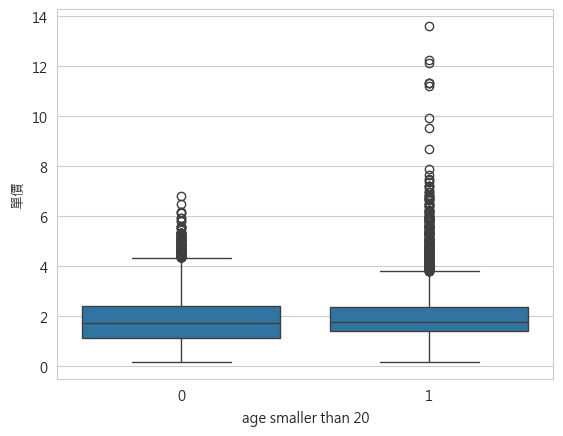

In [3]:
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
sns.boxplot(x='age smaller than 20', y='單價', data=train)


<AxesSubplot:xlabel='is_13_floor', ylabel='單價'>

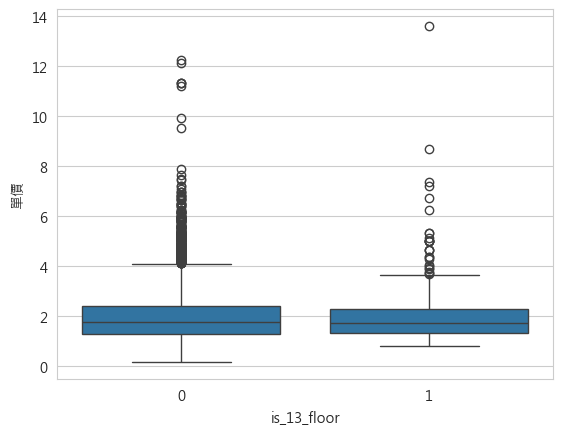

In [10]:
sns.boxplot(x='is_13_floor', y='單價', data=train)

In [11]:
print(train[train['建物型態'] == '住宅大樓(11層含以上有電梯)']['單價'].count())
print(train[train['建物型態'] == '公寓(5樓含以下無電梯)']['單價'].count())
print(train[train['建物型態'] == '華廈(10層含以下有電梯)']['單價'].count())
print(train[train['建物型態'] == '透天厝']['單價'].count())

7148
2437
2158
8


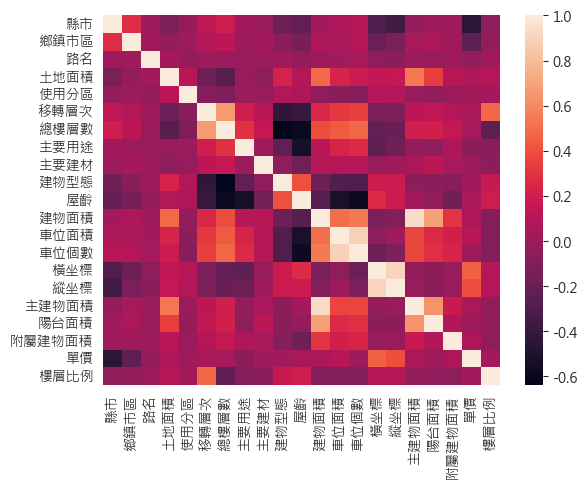

縣市       -0.459016
鄉鎮市區     -0.235385
主要用途     -0.057103
路名       -0.035599
使用分區      0.008904
陽台面積      0.009866
主要建材      0.011903
車位個數      0.013064
建物型態      0.016075
樓層比例      0.025331
總樓層數      0.037874
屋齡        0.049196
移轉層次      0.054038
主建物面積     0.056150
建物面積      0.061327
附屬建物面積    0.064905
土地面積      0.067088
車位面積      0.099986
縱坐標       0.394402
橫坐標       0.455633
單價        1.000000
Name: 單價, dtype: float64

In [17]:
corr_matrix = train.corr()
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
sns.heatmap(corr_matrix, annot=False)

plt.show()
corr_matrix['單價'].sort_values()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


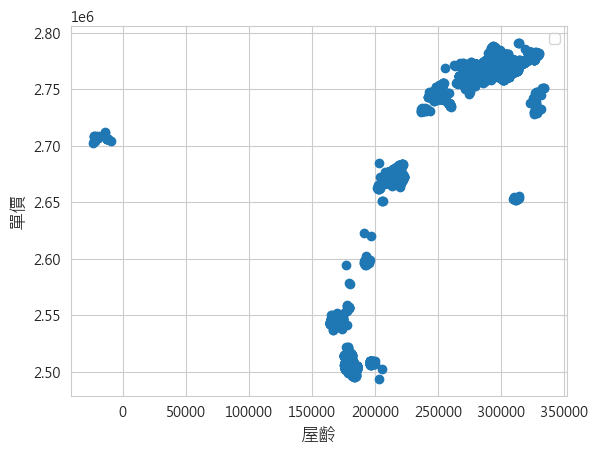

In [23]:
# fig, ax = plt.subplots()
plt.scatter(x = train['橫坐標'], y = train['縱坐標'])
plt.ylabel('單價', fontsize=13)
plt.xlabel('屋齡', fontsize=13)
plt.legend()
plt.show()

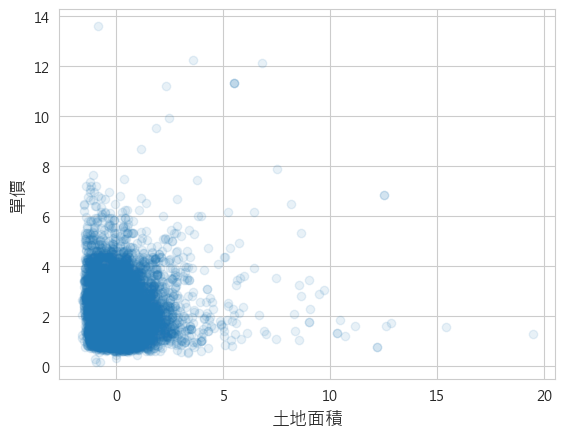

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = train['土地面積'], y = train['單價'], alpha=0.1)
plt.ylabel('單價', fontsize=13)
plt.xlabel('土地面積', fontsize=13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['移轉層次'], y = train['單價'])
plt.ylabel('price', fontsize=13)
plt.xlabel('level', fontsize=13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['總樓層數'], y = train['單價'])
plt.ylabel('price', fontsize=13)
plt.xlabel('totalLevel', fontsize=13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['屋齡'], y = train['單價'])
plt.ylabel('price', fontsize=13)
plt.xlabel('age', fontsize=13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['建物面積'], y = train['單價'])
plt.ylabel('price', fontsize=13)
plt.xlabel('area2', fontsize=13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['車位面積'], y = train['單價'])
plt.ylabel('price', fontsize=13)
plt.xlabel('area car', fontsize=13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['車位個數'], y = train['單價'])
plt.ylabel('price', fontsize=13)
plt.xlabel('n car', fontsize=13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['橫坐標'], y = train['單價'])
plt.ylabel('price', fontsize=13)
plt.xlabel('y coordinate', fontsize=13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['縱坐標'], y = train['單價'])
plt.ylabel('price', fontsize=13)
plt.xlabel('x coordinate', fontsize=13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['主建物面積'], y = train['單價'])
plt.ylabel('price', fontsize=13)
plt.xlabel('main area', fontsize=13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['陽台面積'], y = train['單價'])
plt.ylabel('price', fontsize=13)
plt.xlabel('balcony area', fontsize=13)
plt.show()

In [ ]:
# train = train.drop(train[(train['陽台面積']>= 7)].index)
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['陽台面積'], train['單價'])
plt.ylabel('price', fontsize=13)
plt.xlabel('balcony area', fontsize=13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['附屬建物面積'], y = train['單價'])
plt.ylabel('price', fontsize=13)
plt.xlabel('other area', fontsize=13)
plt.show()

In [ ]:
# train = train.drop(train[(train['附屬建物面積']>= 10)].index)
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['附屬建物面積'], train['單價'])
plt.ylabel('price', fontsize=13)
plt.xlabel('other area', fontsize=13)
plt.show()

In [ ]:
# for col in train.columns:
#     if (train[col].min() < 0):
#         train[col] = train[col] - train[col].min()

In [ ]:
# numeric_feats = train.dtypes[train.dtypes != "object"].index

# # Check the skew of all numerical features
# skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)

In [ ]:

# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     #all_data[feat] += 1
#     train[feat] = boxcox1p(train[feat], lam)
# print(train.isnull().any()) 
# #all_data[skewed_features] = np.log1p(all_data[skewed_features])


In [ ]:
# train = pd.get_dummies(train)
# print(train.shape)

In [ ]:
# ntrain = 2325
# train = train[:ntrain]
# test = train[ntrain:]

# y_train = train['單價']
# train.drop(['單價'], axis = 1)
# y_test = test['單價']
# test.drop(['單價'], axis = 1)

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import make_scorer

In [ ]:
#Validation function
n_folds = 5

def NMAPE(y_true, y_pred): 
    return 1 - np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#make scorer from custome function
nmape_scorer = make_scorer(NMAPE)

def mape_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    mse= -cross_val_score(model, train.values, y_train, scoring=nmape_scorer, cv = kf)
    return(mse)

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
def get_mape(y_true, y_pred):
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

cols = train.columns
cols_map = {x : i for i, x in enumerate(cols)}
train.columns = train.columns.map(cols_map)
train_ID = train[19]
train.drop([19], axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(train, train_ID, test_size=0.2, random_state=33)
print(X_train.info())
cols = X_train.columns
cols_map = {x : i for i, x in enumerate(cols)}
X_train.columns = X_train.columns.map(cols_map)

y_train = y_train.to_frame()
cols = y_train.columns
cols_map = {x : i for i, x in enumerate(cols)}
y_train.columns = y_train.columns.map(cols_map)

cols = X_test.columns
cols_map = {x : i for i, x in enumerate(cols)}
X_test.columns = X_test.columns.map(cols_map)


y_test = y_test.to_frame()
cols = y_test.columns
cols_map = {x : i for i, x in enumerate(cols)}
y_test.columns = y_test.columns.map(cols_map)




In [ ]:
model_xgb.fit(X_train, y_train)
xgb_train_pred = model_xgb.predict(X_train)
# xgb_pred = np.expm1(model_xgb.predict(test))
print(get_mape(y_train, xgb_train_pred))
xgb_train_pred = model_xgb.predict(X_test)
print(get_mape(y_test, xgb_train_pred))

In [ ]:
model_lgb.fit(X_train, y_train)
lgb_train_pred = model_lgb.predict(X_train)
# lgb_pred = np.expm1(model_lgb.predict(test.values))
print(get_mape(y_train, lgb_train_pred))
lgb_train_pred = model_lgb.predict(X_test)
print(get_mape(y_test, lgb_train_pred))

In [ ]:
GBoost.fit(X_train, y_train)
GBoost_pred = GBoost.predict(X_train)
# lgb_pred = np.expm1(model_lgb.predict(test.values))
print(get_mape(y_train, GBoost_pred))
GBoost_pred = GBoost.predict(X_test)
print(get_mape(y_test, GBoost_pred))

In [ ]:
import csv
### Output the predict result to output.csv, the format is corrent (checked)
with open('output.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID', 'predicted_price'])

    for i, pred in enumerate(GBoost_pred):
        writer.writerow(['PU-' + str(i+1), pred])

